### QC+ for Cai 2020 dataset

#### Objective: Run advanced QC for the Cai 2020 dataset, including data normalization, log transformation, and UMAP visualization


**Developed by**: Mairi McClean
**Affiliation**: Computational Health Centre - Helmholtz Munich
**v221130**


### Load modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
executing           1.1.1
google              NA
h5py                3.6.0
hypergeom_ufunc     NA
ipykernel           6.16.2
ipywidgets          8.0.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.6.1
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numexpr             2.8.1
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources

### Read in anndata object

In [3]:
adata = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/2111_2511_exported_objects/23/CaiY2020_PBMC_TB_QCed_pre-process_mm221123.h5ad')
adata

AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors', 'status_colors'
    layers: 'counts', 'sqrt_norm'

### Data normalization

In [6]:
# target_sum taken from Scanpy tutorial [https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html]

#If exclude_highly_expressed=True, very highly expressed genes are excluded from the computation of the normalization factor (size factor) for each cell. 
#This is meaningful as these can strongly influence the resulting normalized values for all other genes [Weinreb17]."

sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


### Data log transformation

In [5]:
sc.pp.log1p(adata)

### Identify highly variable genes

In [7]:
# taken from Scanpy tutorial; values predetermined

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
adata.var


,gene_id,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
DDX11L1,ENSG00000223972.5,False,False,6,0.000082,99.991797,6.0,False,1.530551e+01,26.505063,0.122819
WASH7P,ENSG00000227232.5,False,False,1,0.000014,99.998633,1.0,False,2.731106e-04,2.994715,-2.187728
MIR6859-1,ENSG00000278267.1,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
MIR1302-2HG,ENSG00000243485.5,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
MIR1302-2,ENSG00000284332.1,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695.2,True,False,10818,0.183059,85.210401,13390.0,False,4.090852e+01,49.067069,-0.920662
MT-TE,ENSG00000210194.1,True,False,626,0.008627,99.144177,631.0,False,3.835359e+01,49.004516,-0.157020
MT-CYB,ENSG00000198727.2,True,False,70927,9.182444,3.033659,671659.0,False,4.443121e+01,51.569948,1.485187
MT-TT,ENSG00000210195.2,True,False,228,0.003144,99.688295,230.0,False,1.400948e+01,25.208300,1.599646


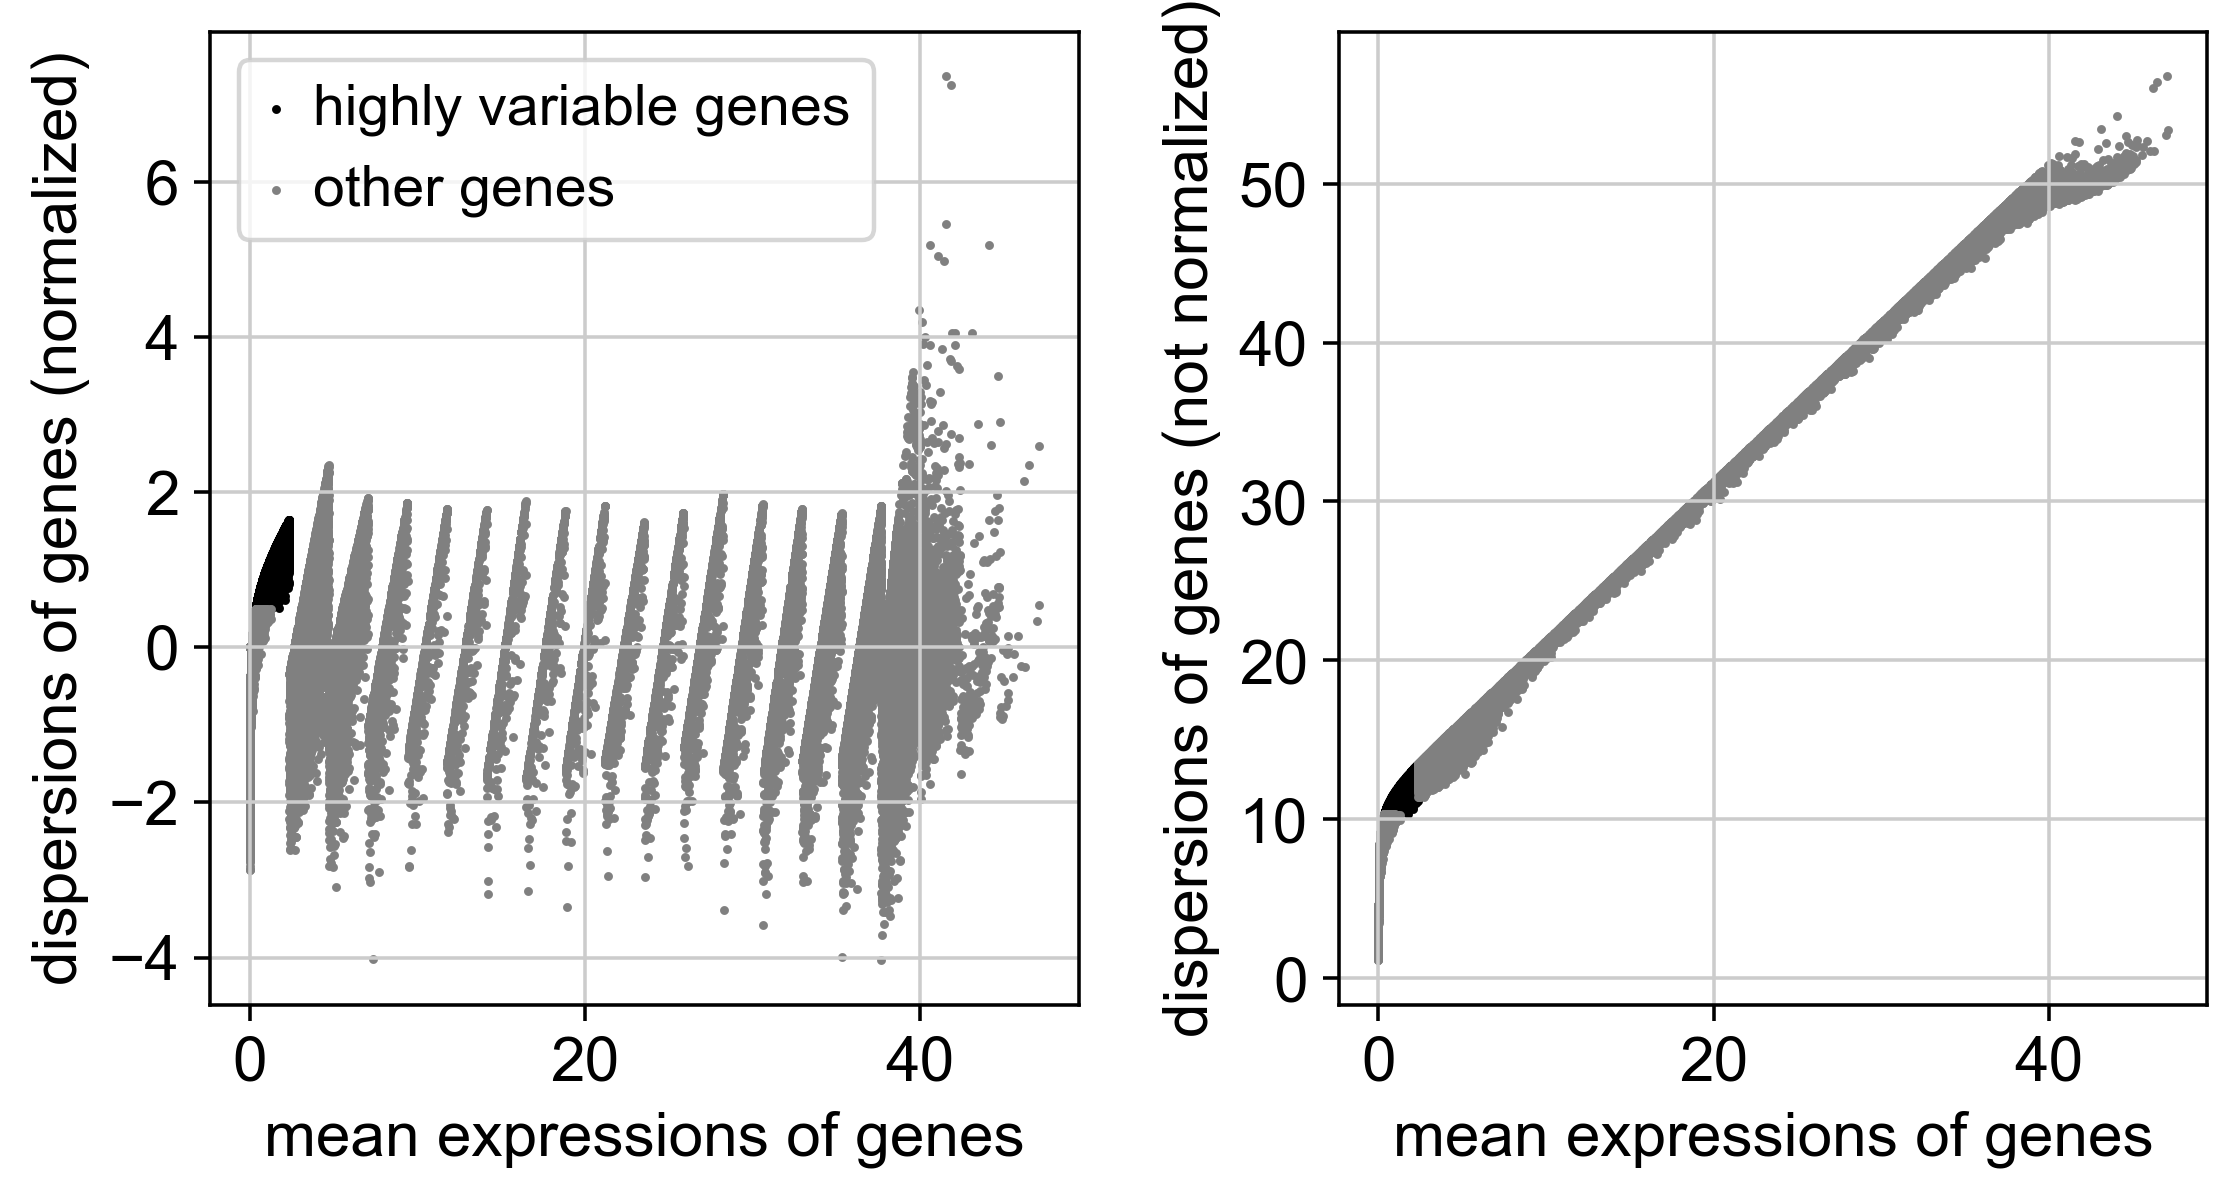

In [13]:
sc.pl.highly_variable_genes(adata)


In [ ]:
# UMAP visualization